In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from scipy.stats import wilcoxon
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from random import seed, randrange

In [7]:
def generateData():
  data=[]
  datatrain=[]
  datatest=[]
  r1 = -2
  r2 = 4
  #training dataset
  for i in range (1000):
    ele=[]
    angle = np.random.uniform(np.pi*-1,np.pi*1)
    noise = np.random.multivariate_normal((0,0),[[1,0],[0,1]],1)
    labeltogenerate = np.random.uniform()
    if(labeltogenerate < 0.5):
      ele.append(r1*np.cos(angle)+noise[0][0])
      ele.append(r1*np.sin(angle) + noise[0][1])
      ele.append(0)
    else:
      ele.append(r2*np.cos(angle)+noise[0][0])
      ele.append(r2*np.sin(angle) + noise[0][1])
      ele.append(1)
    datatrain.append(ele)
  df1000 = pd.DataFrame(datatrain, columns = ['x1', 'x2','label'])
  print(df1000.head())
  print(df1000.shape)
 # testing dataset
  for i in range (10000):
    ele=[]
    angle = np.random.uniform(np.pi*-1,np.pi*1)
    noise = np.random.multivariate_normal((0,0),[[1,0],[0,1]],1)
    labeltogenerate = np.random.uniform()
    if(labeltogenerate < 0.5):
      ele.append(r1*np.cos(angle)+noise[0][0])
      ele.append(r1*np.sin(angle) + noise[0][1])
      ele.append(0)
    else:
      ele.append(r2*np.cos(angle)+noise[0][0])
      ele.append(r2*np.sin(angle) + noise[0][1])
      ele.append(1)
    datatest.append(ele)
  df10000 = pd.DataFrame(datatest, columns = ['x1', 'x2','label'])
  print(df10000.head())
  print(df10000.shape)
  data.append(df1000)
  data.append(df10000)
  return data

In [8]:
data = generateData()

         x1        x2  label
0  1.345918 -2.701394      0
1 -2.635335  2.304380      0
2 -1.515382 -2.080192      0
3 -0.588295  1.162206      0
4 -1.596540  0.282644      0
(1000, 3)
         x1        x2  label
0 -0.886434 -2.579292      1
1 -2.423911 -1.109991      1
2 -0.132375 -3.633355      1
3  0.674298  1.607789      0
4  0.410551 -2.448940      1
(10000, 3)


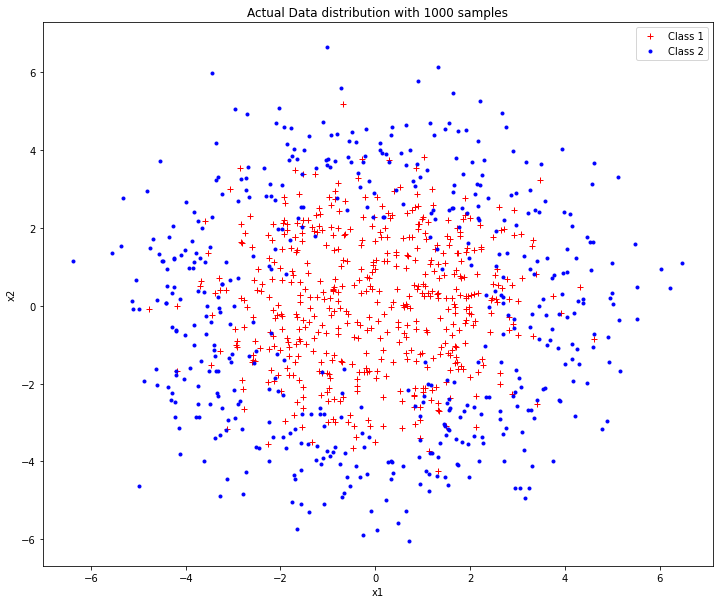

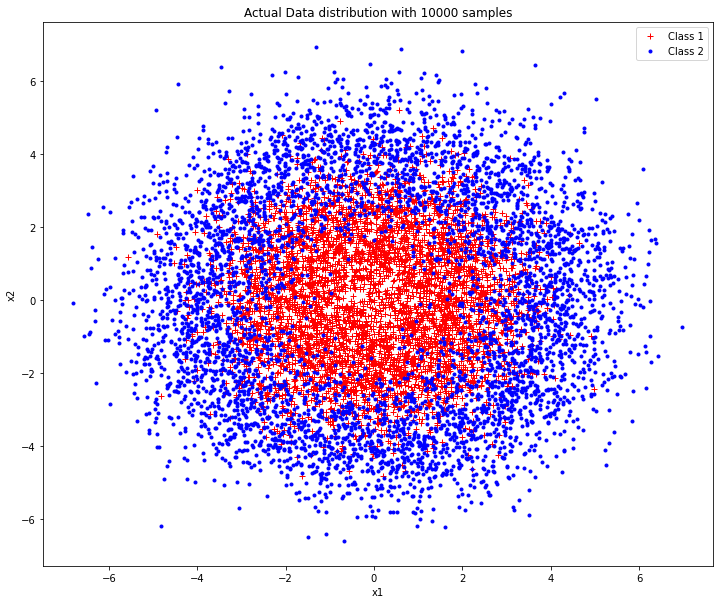

In [9]:
#plot data
def plotData(df):
  x0 = [i for i in range(df.shape[0]) if (df.label[i] == 0)]
  x1 = [i for i in range(df.shape[0]) if (df.label[i] == 1)]
  fig = plt.figure(figsize=(12,10))
  #ax = Axes2D(fig)
  plt.plot(df.x1[x0],df.x2[x0],'+',color ='red')
  plt.plot(df.x1[x1],df.x2[x1],'.',color = 'blue')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title("Actual Data distribution with {} samples".format(df.shape[0]))
  plt.legend(['Class 1','Class 2'])
  plt.show()
plotData(data[0])
plotData(data[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: KerasClassifier is deprec

Results for training dataset with 1 perceptrons: 50.0 3.4073448979741903
Results for training dataset with 2 perceptrons: 50.49999952316284 5.844655458609112
Results for training dataset with 5 perceptrons: 48.500001430511475 9.952386080682448
Results for training dataset with 10 perceptrons: 45.00000178813934 8.699999845576087
Results for training dataset with 25 perceptrons: 28.00000011920929 13.287587906590783
Results for training dataset with 50 perceptrons: 32.499998807907104 9.123595992467704
Results for training dataset with 100 perceptrons: 25.0 8.141866854142982


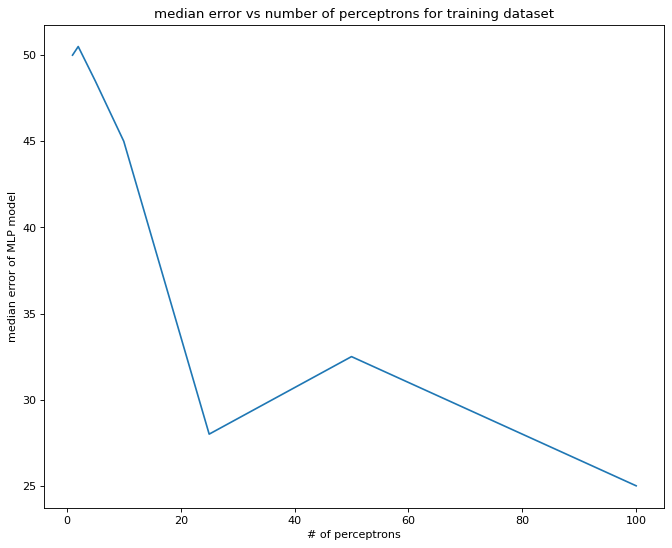

wilcoxon p-value between 1 & 2 perceptrons: 0.8334336202223243
wilcoxon p-value between 2 & 5 perceptrons: 0.26039294361048326
wilcoxon p-value between 5 & 10 perceptrons: 0.4439943760230095
wilcoxon p-value between 10 & 25 perceptrons: 0.03665792867221451
wilcoxon p-value between 25 & 50 perceptrons: 0.37341957891194966
wilcoxon p-value between 50 & 100 perceptrons: 0.4439943760230095


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


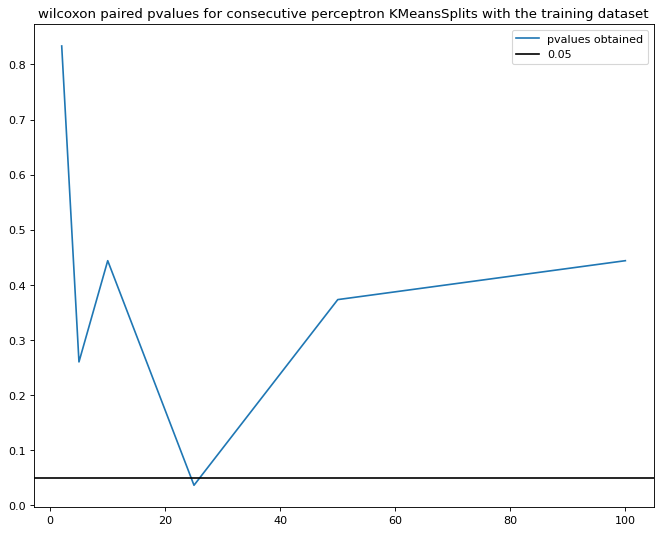

In [20]:
#MLP classifiers
def kerasModel1():
  model = Sequential()
  model.add(Dense(1, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel2():
  model = Sequential()
  model.add(Dense(2, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel5():
  model = Sequential()
  model.add(Dense(5, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel10():
  model = Sequential()
  model.add(Dense(10, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel25():
  model = Sequential()
  model.add(Dense(25, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel50():
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
def kerasModel100():
  model = Sequential()
  model.add(Dense(100, input_dim=2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
perceptrons=[1,2,5,10,25,50,100]
df=data[0]
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
kfold = KFold(n_splits=10, shuffle=True,random_state=2)
estimator1 = KerasClassifier(build_fn=kerasModel1, nb_epoch=200, batch_size=5,verbose=0)
results1 = cross_val_score(estimator1, X, labels, cv=kfold)
estimator2 = KerasClassifier(build_fn=kerasModel2, nb_epoch=200, batch_size=5,verbose=0)
results2 = cross_val_score(estimator2, X, labels, cv=kfold)
estimator5 = KerasClassifier(build_fn=kerasModel5, nb_epoch=200, batch_size=5,verbose=0)
results5 = cross_val_score(estimator5, X, labels, cv=kfold)
estimator10 = KerasClassifier(build_fn=kerasModel10, nb_epoch=200, batch_size=5,verbose=0)
results10 = cross_val_score(estimator10, X, labels, cv=kfold)
estimator25 = KerasClassifier(build_fn=kerasModel25, nb_epoch=200, batch_size=5,verbose=0)
results25 = cross_val_score(estimator25, X, labels, cv=kfold)
estimator50 = KerasClassifier(build_fn=kerasModel50, nb_epoch=200, batch_size=5,verbose=0)
results50 = cross_val_score(estimator50, X, labels, cv=kfold)
estimator100 = KerasClassifier(build_fn=kerasModel100, nb_epoch=200, batch_size=5,verbose=0)
results100 = cross_val_score(estimator100, X, labels, cv=kfold)
print("Results for training dataset with 1 perceptrons: {} {}" .format(100-np.median(results1)*100, results1.std()*100))
print("Results for training dataset with 2 perceptrons: {} {}" .format(100-np.median(results2)*100, results2.std()*100))
print("Results for training dataset with 5 perceptrons: {} {}" .format(100-np.median(results5)*100, results5.std()*100))
print("Results for training dataset with 10 perceptrons: {} {}" .format(100-np.median(results10)*100, results10.std()*100))
print("Results for training dataset with 25 perceptrons: {} {}" .format(100-np.median(results25)*100, results25.std()*100))
print("Results for training dataset with 50 perceptrons: {} {}" .format(100-np.median(results50)*100, results50.std()*100))
print("Results for training dataset with 100 perceptrons: {} {}" .format(100-np.median(results100)*100, results100.std()*100))
results=[]
results.append(100-np.median(results1)*100)
results.append(100-np.median(results2)*100)
results.append(100-np.median(results5)*100)
results.append(100-np.median(results10)*100)
results.append(100-np.median(results25)*100)
results.append(100-np.median(results50)*100)
results.append(100-np.median(results100)*100)
figure(figsize=(10, 8), dpi=80)
plt.plot(perceptrons, results)
plt.xlabel('# of perceptrons')
plt.ylabel('median error of MLP model')
plt.title('median error vs number of perceptrons for training dataset')
plt.show()
#pvalues
w1,p1 = wilcoxon(results1,results2)
print("wilcoxon p-value between 1 & 2 perceptrons: {}".format(p1))
w2,p2 = wilcoxon(results2,results5)
print("wilcoxon p-value between 2 & 5 perceptrons: {}".format(p2))
w3,p3 = wilcoxon(results5,results10)
print("wilcoxon p-value between 5 & 10 perceptrons: {}".format(p3))
w4,p4 = wilcoxon(results10,results25)
print("wilcoxon p-value between 10 & 25 perceptrons: {}".format(p4))
w5,p5 = wilcoxon(results25,results50)
print("wilcoxon p-value between 25 & 50 perceptrons: {}".format(p5))
w6,p6 = wilcoxon(results50,results100)
print("wilcoxon p-value between 50 & 100 perceptrons: {}".format(p6))
pvalues=[p1,p2,p3,p4,p5,p6]
figure(figsize=(10, 8), dpi=80)
plt.plot(perceptrons[1:], pvalues)
plt.axhline(y=0.05, color='black', linestyle='-')
plt.title('wilcoxon paired pvalues for consecutive perceptron KMeansSplits with the training dataset')
plt.legend(['pvalues obtained','0.05'])
plt.show()

In [15]:
def plot_trained_model(model_type, model, features, labels):
    predictions = np.squeeze(model.predict(features))
    correct = np.array(np.squeeze((np.round(predictions) == labels).nonzero()))
    incorrect = np.array(np.squeeze((np.round(predictions) != labels).nonzero()))

    plt.plot(features[correct][:,0],
            features[correct][:,1],
            'b.', alpha=0.25)
    plt.plot(features[incorrect][:,0],
            features[incorrect][:,1],
            'r.', alpha=0.25)
    plt.title(model_type + ' Classification Performance')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(['Correct classification', 'Incorrect classification'])

    gridpoints = np.meshgrid(np.linspace(-8, 8, 128), np.linspace(-8, 8, 128))
    contour_values = np.transpose(np.reshape(model.predict(np.reshape(np.transpose(gridpoints), (-1, 2))), (128, 128)))
    plt.contourf(gridpoints[0], gridpoints[1], contour_values, levels=1);
    plt.colorbar();
    fig = plt.figure(figsize=(12,10))
    plt.show()

Epoch 1/100
1000/1000 [==============================] - 2s 1ms/step - loss: 0.6625 - accuracy: 0.6330
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5654 - accuracy: 0.7620
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4907 - accuracy: 0.8040
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4432 - accuracy: 0.8220
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4154 - accuracy: 0.8170
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3992 - accuracy: 0.8130
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3917 - accuracy: 0.8230
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3854 - accuracy: 0.8250
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3795 - accuracy: 0.8280
Epoch 10/100
1000/1000 [==============================] - 1s 1ms/step - l

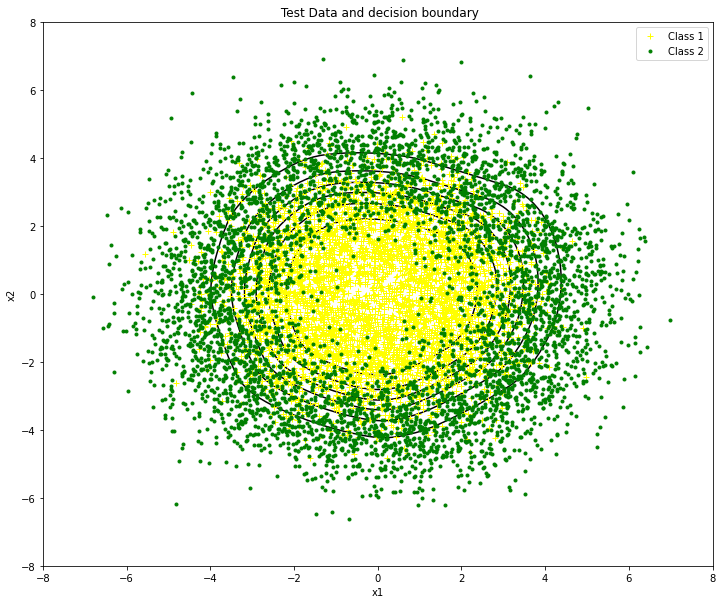

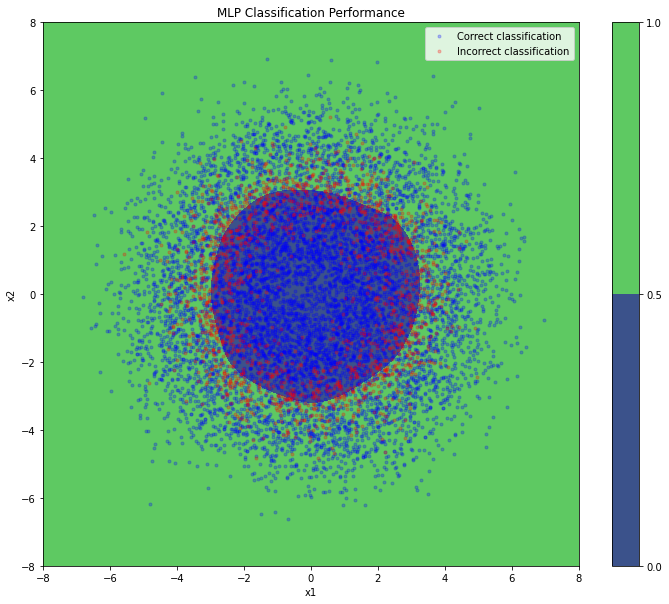

<Figure size 864x720 with 0 Axes>

In [17]:
# train the 25 perceptron model
df=data[0]
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
estimator = kerasModel25()
estimator.fit(X,labels,epochs=100,batch_size=1,verbose=1)
#check the performace on test data
df_test = data[1]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
y_pred = estimator.predict(X_test)
y_pred = y_pred>0.5
cm = confusion_matrix(y_pred, labels_test)
y_eval = estimator.evaluate(X_test,labels_test)
print("accuracy on the test set for the best neural network model is {}".format(y_eval[1]*100))
#plot_data=[]
#plot contours of decision boundary
#horizontalGrid = np.linspace(np.floor(min(X_test[:,0])),np.ceil(np.max(X_test[:,0])),100)
horizontalGrid = np.linspace(-8,8,100)
verticalGrid = np.linspace(-8,8,100)
#verticalGrid = np.linspace(np.floor(min(X_test[:,1])),np.ceil(np.max(X_test[:,1])),100);
dsg = np.zeros((100,100))
a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
for i in range(100):
  for j in range(100):
    data_point = np.array([a[0,i,j],a[1,i,j]]).reshape(1,2)
    dsg[i][j] = estimator(data_point,training=False)
x0 = [i for i in range(df_test.shape[0]) if (df_test.label[i] == 0)]
x1 = [i for i in range(df_test.shape[0]) if (df_test.label[i] == 1)]
fig = plt.figure(figsize=(12,10))
plt.plot(df_test.x1[x0],df_test.x2[x0],'+',color ='yellow')
plt.plot(df_test.x1[x1],df_test.x2[x1],'.',color = 'green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(" Test Data and decision boundary")
plt.legend(['Class 1','Class 2'])
#fig, ax = plt.subplots()
plt.contour(a[0],a[1],dsg, colors='black')
#ax.clabel(CS, inline=1, fontsize=50)
plt.show()
fig = plt.figure(figsize=(12,10))
plot_trained_model('MLP',estimator,X_test,labels_test)

For maximum accuracy 83.5 gamma = 0.001 and C=100
    gamma        C  median_accuracy
0  0.0001   0.0001             51.0
1  0.0001   0.0010             51.0
2  0.0001   0.0100             51.0
3  0.0001   0.1000             51.0
4  0.0001  10.0000             51.0
(36, 3)
[0, 1, 2, 3, 4, 5]


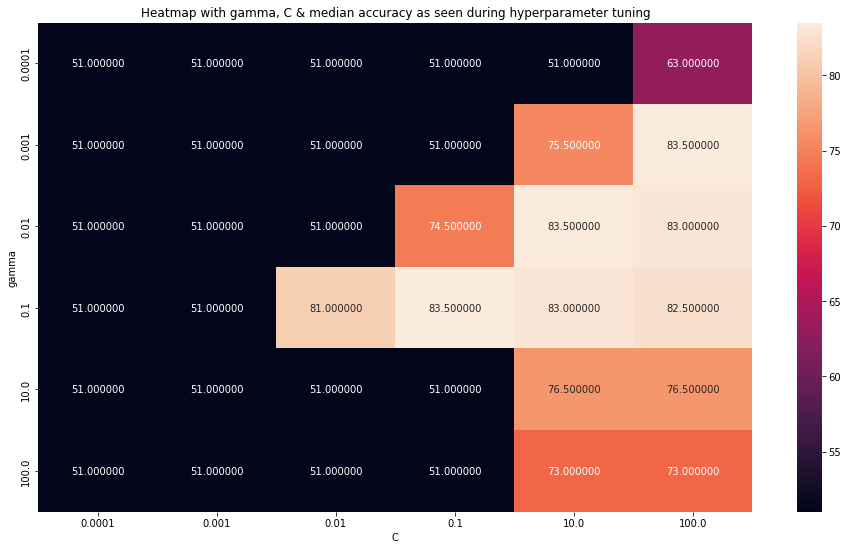

In [22]:
# SVM Classifier
ans={}
kfold = KFold(n_splits=10, shuffle=True,random_state=2)
gamma_values=[0.0001,0.001,0.01,0.1,10,100]
C_values=[0.0001,0.001,0.01,0.1,10,100]
for gamma in gamma_values:
  for c in C_values:
    df=data[0]
    labels = df['label'].to_numpy()
    dataonly = df.drop(['label'], axis =1)
    X = dataonly.to_numpy()
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)
    clf = SVC(C= c, kernel = 'rbf', gamma=gamma)
    results = cross_val_score(clf, X, labels, cv=kfold)
    ans[(gamma,c)]=np.median(results)*100
store_c=[]
store_gamma=[]
store_acc=[]
data_heatmap=[]
# find entries with max median accuracy
max=0
max_key=()
for key in ans:
  ele=[]
  store_c.append(key[1])
  store_gamma.append(key[0])
  store_acc.append(ans[key])
  ele.append(key[0])
  ele.append(key[1])
  ele.append(ans[key])
  if(ans[key]>max):
    max=ans[key]
    max_key=key
  data_heatmap.append(ele)
print("For maximum accuracy {} gamma = {} and C={}".format(max, max_key[0],max_key[1]))
#print the heatmap
df_heatmap = pd.DataFrame(data_heatmap, columns = ['gamma', 'C','median_accuracy'])
print(df_heatmap.head())
print(df_heatmap.shape)
plt.figure(figsize=(16,9))
'''store_acc = np.array(store_acc).reshape(25,1)
store_c = np.array(C_values).reshape(5,1)
store_gamma = np.array(gamma_values).reshape(5,1)
print(store_acc.shape)
print(store_gamma.shape)
print(store_c.shape)'''
#sns.heatmap(store_acc, xticklabels=store_gamma, yticklabels=store_c)
df_heatmap = df_heatmap.pivot('gamma', 'C', 'median_accuracy')
sns.heatmap(df_heatmap,annot=True, fmt="f")
# 3D scatterplot
ax = Axes3D(fig)
'''ax.scatter(df.x1[x0],df.x2[x0],df.x3[x0],'+',color ='red')
ax.scatter(df.x1[x1],df.x2[x1],df.x3[x1],'.',color = 'blue')
ax.scatter(df.x1[x2],df.x2[x2],df.x3[x2],'*',color = 'green')'''
index = list(range(df_heatmap.shape[0]))
print(index)
#ax.scatter(df_heatmap.gamma[index],df_heatmap.C[index],df_heatmap.median_accuracy[index],'*',color = 'red')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
ax.set_zlabel('median accuracy')
plt.title("Heatmap with gamma, C & median accuracy as seen during hyperparameter tuning")
plt.show()

In [25]:
#train SVM classifier with highest cross validation hyperparameters
df=data[0]
labels = df['label'].to_numpy()
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()
clf = SVC(C=0.1,kernel='rbf',gamma=0.1)
clf.fit(X,labels)
# compute accuracy of trained SVM on the test set
df_test = data[1]
labels_test = df_test['label'].to_numpy()
dataonly_test = df_test.drop(['label'], axis =1)
X_test = dataonly_test.to_numpy()
y_pred = clf.predict(X_test)
y_pred = y_pred>0.5
cm = confusion_matrix(y_pred, labels_test)
print("accuracy of best SVM classifier is {}".format(clf.score(X_test,labels_test)))

accuracy of best SVM classifier is 0.8271


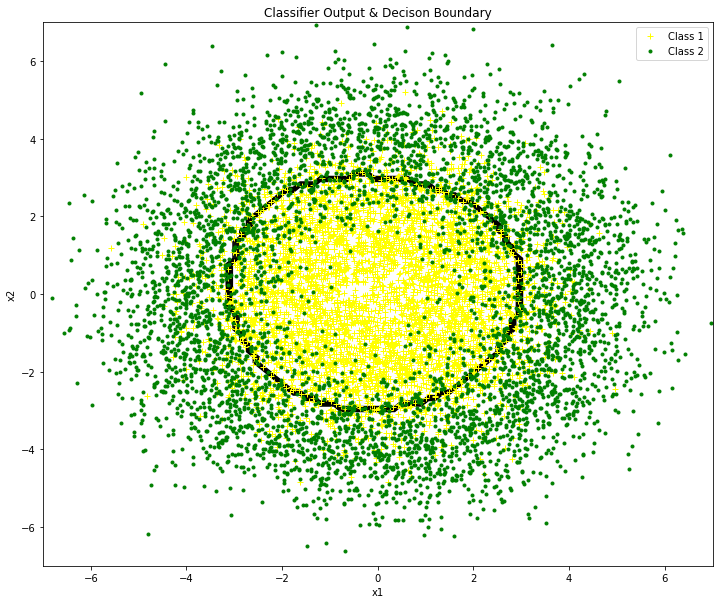

In [26]:
#plot data and decision boundary for SVM
horizontalGrid = np.linspace(np.floor(min(X_test[:,0])),np.ceil(np.max(X_test[:,0])),100)
verticalGrid = np.linspace(np.floor(min(X_test[:,1])),np.ceil(np.max(X_test[:,1])),100);
dsg = np.zeros((100,100))
a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
for i in range(100):
    for j in range(100):
      data_point = np.array([a[0,i,j],a[1,i,j]]).reshape(1,2)
      dsg[i][j] = clf.predict(data_point)
x0 = [i for i in range(df_test.shape[0]) if (df_test.label[i] == 0)]
x1 = [i for i in range(df_test.shape[0]) if (df_test.label[i] == 1)]
fig = plt.figure(figsize=(12,10))
plt.plot(df_test.x1[x0],df_test.x2[x0],'+',color ='yellow')
plt.plot(df_test.x1[x1],df_test.x2[x1],'.',color = 'green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Class 1','Class 2'])
plt.contour(a[0],a[1],dsg,colors='black')
plt.title('Classifier Output & Decison Boundary')
plt.show()

In [12]:
a.shape

(2, 100, 100)

In [38]:
a[0,8,9]

-6.636363636363637

In [39]:
a[1,3,4]

-7.545454545454545

In [27]:
np.array([a[0,8,9],a[1,3,4]]).reshape(2,1)

array([[-6.63636364],
       [-7.54545455]])

## Q2

In [69]:
uploaded=files.upload()

Saving img2.jpg to img2.jpg


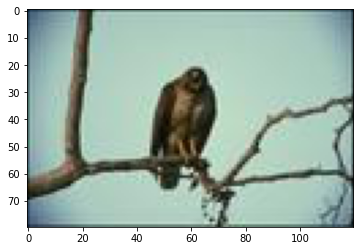

In [71]:
img = mpimg.imread('img2.jpg')
plt.imshow(img)

In [72]:
i_array = img_to_array(img)
print(i_array.shape)

(80, 120, 3)


In [73]:
def split_data(data, folds):
  data_split = []
  seed(1)
  data_temp = list(data)
  fold_size = int(len(data) / folds)
  for i in range(folds):
    fold = list()
    while len(fold) < fold_size:
      rand_index = randrange(len(data_temp))
      fold.append(data_temp.pop(rand_index))
    data_split.append(fold)
  return data_split

In [74]:
def test_train_split(folds,i):
  test = np.array(folds.pop(i))
  train = np.array(folds)
  Xtest = test[:,0:6]
  Xtrain = train[:,:,0:6].reshape(-1,5)
  return Xtrain,Xtest

In [75]:
def norm(data):
  for i in range(5):
    data[:,i] = (data[:,i] - np.min(data[:,i]))/(np.max(data[:,i]) - np.min(data[:,i]))
  return data

In [76]:
hypercube = np.zeros((i_array.shape[0]*i_array.shape[1],5))
hc_row = 0
for i in range(i_array.shape[0]):
  for j in range(i_array.shape[1]):
    hypercube[hc_row,0] = i
    hypercube[hc_row,1] = j
    for rgb in range(3):
      hypercube[hc_row,rgb+2] = i_array[i,j,rgb]
    hc_row += 1
hypercube = normalize(hypercube,axis=0,norm='max')

In [77]:
hypercube.shape

(9600, 5)

In [78]:
hypercube[7]

array([0.        , 0.05882353, 0.25112108, 0.3526971 , 0.45495495])

In [84]:
data_splitted = split_data(hypercube,10)

In [89]:
len(data_splitted.pop(1))

960

In [92]:
f = [] 
for m in range(1,11): 
  ml = []
  for k in range(10): 
    X_train,X_test = test_train_split(split_data(hypercube,10),k)
    model = GaussianMixture(n_components= m)
    model.fit(X_train)
    ml.append(model.score(X_test))
  f.append(np.median(ml))


In [93]:
f

[3.4733308721968497,
 4.999269779445992,
 5.37963994491039,
 5.605179086284561,
 5.807787700467982,
 6.050415703375897,
 6.220401946143086,
 6.312392909532953,
 6.483128344605969,
 6.636381623805623]

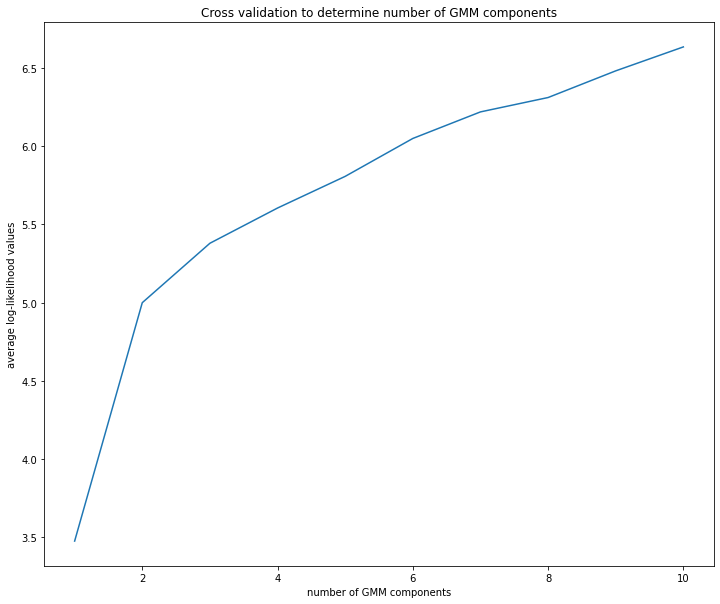

In [95]:
fig = plt.figure(figsize=(12,10))
plt.plot(list(range(1,11)), f)
plt.xlabel('number of GMM components')
plt.ylabel('average log-likelihood values')
plt.title('Cross validation to determine number of GMM components')
plt.show()

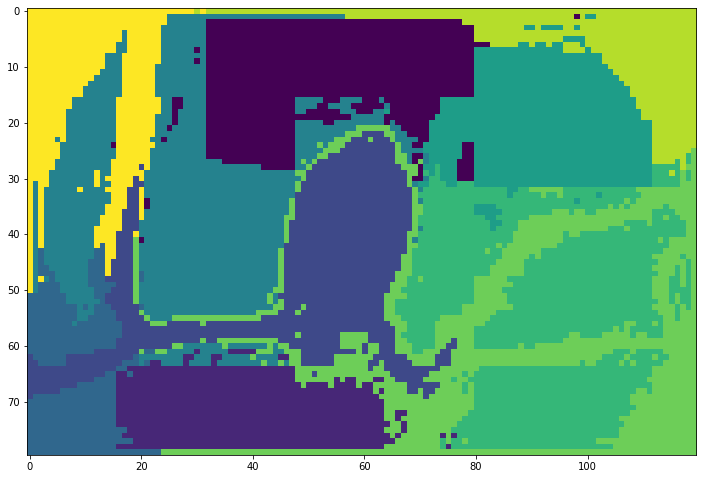

In [98]:
model = GaussianMixture(n_components= 10,init_params='kmeans', max_iter=100)
model.fit(hypercube)
fig = plt.figure(figsize=(12,10))
final_results = np.zeros((i_array.shape[0]*i_array.shape[1],model.n_components))
for i in range(model.n_components):
  pdf = multivariate_normal.pdf(hypercube, mean=model.means_[i,:],cov=model.covariances_[i,:,:])
  final_results[:,i] = np.array(model.weights_[i]*pdf)
final_results = np.argmax(final_results, axis=1)
plt.imshow(final_results.reshape(i_array.shape[0],i_array.shape[1]))
plt.show()

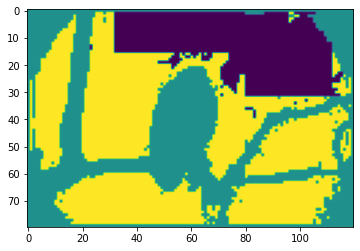

In [97]:
model = GaussianMixture(n_components= 3,init_params='kmeans', max_iter=100)
model.fit(hypercube)
final_results = np.zeros((i_array.shape[0]*i_array.shape[1],model.n_components))
for i in range(model.n_components):
  pdf = multivariate_normal.pdf(hypercube, mean=model.means_[i,:],cov=model.covariances_[i,:,:])
  final_results[:,i] = np.array(model.weights_[i]*pdf)
final_results = np.argmax(final_results, axis=1)
plt.imshow(final_results.reshape(i_array.shape[0],i_array.shape[1]))
plt.show()